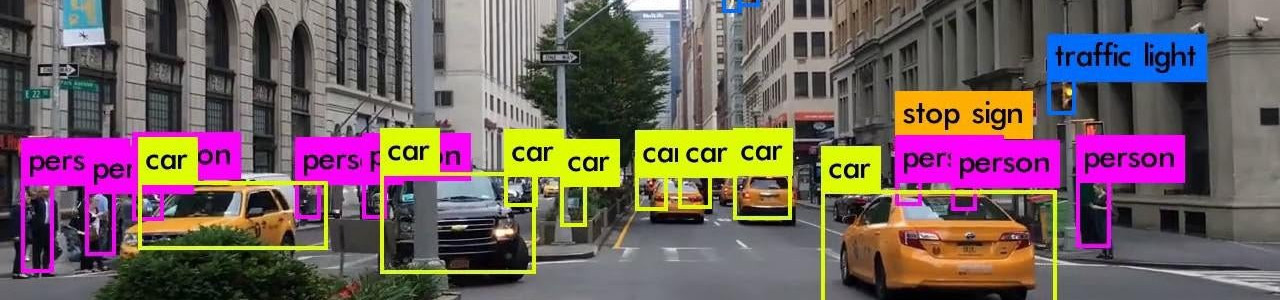

# Convolutional Neural Network

## I) - Introduction

Today, artificial intelligence allows us to do fabulous things...

If I ask you to write an algorithm that can detect a cat on a picture, would you develop it?\
Maybe you would have a result that works from time to time, and even that would be an achievement.

The color of the fur, the color of the eyes, the position of the cat, the size of the cat, the perspective ... so many parameters to take into account.

But let's go further, let's say I ask you to write an algorithm that can tell the difference between more than 1000 different species in an image.\
You would give up, wouldn't you?

Let me introduce you to convolutional neural networks, used to manipulate visual data.

### What is a Convolutional Neural Network

### Torchvision - Introduction & Installation

## II) - Get the data

### Visualize the data

### Using Batch

### Probabilstic Prediction

## III) - Image & simple NN

## IV) - CNN (Convolutional Neural Network)

### Convolutional filters

### Pooling layers

### Torch & CNN

## V) Championship PT.2

In [1]:
!pip3 install torch
!pip3 install torchvision

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms

In [4]:
train_set = torchvision.datasets.MNIST(
  root="./data/MNIST",
  train=True,
  download=True,
  transform=transforms.Compose([
    transforms.ToTensor()
  ])
)

test_set = torchvision.datasets.MNIST(
  root="./data/MNIST",
  train=False,
  download=True,
  transform=transforms.Compose([
    transforms.ToTensor()
  ])
)

100.0%


Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



100.0%


Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



100.0%


Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



100.0%

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



Figure(640x480)


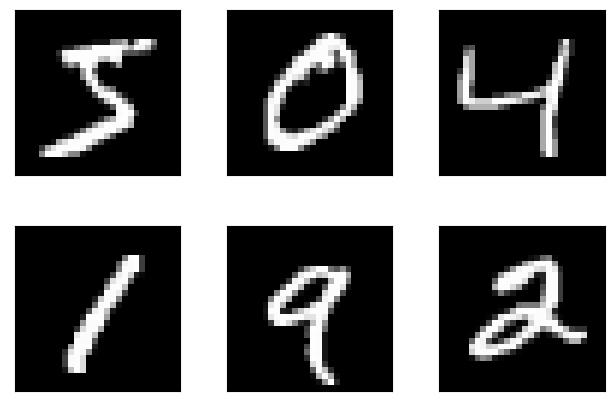

In [5]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(train_set[i][0].reshape(28, 28, 1), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
print(fig)

In [6]:
image, label = train_set[0]
print("total images :", len(train_set)) # pixels value
print("shape :", image.shape) # pixels value
print("label :", label) # Number represented in the image

total images : 60000
shape : torch.Size([1, 28, 28])
label : 5


In [7]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64)

print("nuber of batches :", len(train_loader))

batch = next(iter(train_loader)) #take the first batch
images, labels = batch
print("shape :", images.shape)
print("labels :", labels.shape)

nuber of batches : 938
shape : torch.Size([64, 1, 28, 28])
labels : torch.Size([64])


In [8]:

class MyNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(1, 10)
        self.linear2 = torch.nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.linear1(x))
        x = torch.nn.functional.relu(self.linear2(x))
        return x

model = MyNetwork()
input = torch.ones((64, 1), dtype=torch.float)

mse = torch.nn.MSELoss() # Loss function
expected = torch.ones((64, 1), dtype=torch.float)

output = model.forward(input)
loss = mse(output, expected)

print("Input  :", input.shape)
print("Output :", output.shape)
print("loss :", output.shape)

Input  : torch.Size([64, 1])
Output : torch.Size([64, 1])
loss : torch.Size([64, 1])


In [9]:
loss_fonct = torch.nn.CrossEntropyLoss() # Loss function

output = torch.rand((64, 10), dtype=torch.float) # theoretical output of the model
expected = torch.ones((64), dtype=torch.long) # expected labels

loss_fonct(output, expected)

tensor(2.3404)

In [10]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(28 * 28, 256)
        self.linear2 = torch.nn.Linear(256, 128)
        self.linear3 = torch.nn.Linear(128, 64)
        self.linear4 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.linear1(x))
        x = torch.nn.functional.relu(self.linear2(x))
        x = torch.nn.functional.relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [11]:
EPOCH = 2

model = MyModel()
loss_fonct = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(EPOCH): #training
    for batch in train_loader:
        optimizer.zero_grad()
        images, labels = batch
        output = model.forward(images.reshape(32, 28 * 28))
        loss = loss_fonct(output, labels)
        loss.backward()
        optimizer.step()
        print(loss)

total, correct = 0, 0
for image, label in test_set: #testing
    output = model.forward(image.reshape(1, 28 * 28))
    if (output.argmax(dim=1).item() == label):
        correct += 1
    total += 1

print("Accuracy:", correct / total)

RuntimeError: shape '[32, 784]' is invalid for input of size 50176

In [12]:
image = torch.randn(1, 1, 28, 28)
filter = torch.randn(1, 1, 3, 3)

out_feat_F = F.conv2d(image, filter, stride=1, padding=0)
out_feat_F.shape

torch.Size([1, 1, 26, 26])

In [13]:
image = torch.randn(1, 1, 28, 28)
filter = torch.randn(1, 1, 3, 3)

out_feat_F = F.conv2d(image, filter, stride=1, padding=1)
out_feat_F.shape

torch.Size([1, 1, 28, 28])

In [14]:
image = torch.randn(1, 1, 28, 28)
filter = torch.randn(1, 1, 2, 4)

out_feat_F = F.conv2d(image, filter, stride=2, padding=1)
out_feat_F.shape

torch.Size([1, 1, 15, 14])

In [15]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5)
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5)
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(4 * 4, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)

        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)

        x = x.reshape(-1, 4 * 4)

        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [17]:
EPOCH = 5

model = MyModel()
loss_fonct = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(EPOCH): #training
    for batch in train_loader:
        images, labels = batch
        output = model.forward(images)
        loss = loss_fonct(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

total, correct = 0, 0
for image, label in test_set: #testing
    output = model.forward(image.reshape(1, 1, 28, 28))
    if (output.argmax(dim=1).item() == label):
        correct += 1
    total += 1
print("Accuracy:", correct / total)

Accuracy: 0.8997
